In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [105]:
def error_rate(p, t):
    return np.mean(p != t)
def standardize(x):
    return x/255

In [82]:
data = pd.read_csv("../input/train.csv")

In [106]:
y=data["label"]
x=data.drop("label",axis=1)
#train
x_train, x_test, y_train_index, y_test_index = train_test_split(x, y, test_size=0.3, random_state=1)
x_train = standardize(x_train)
x_test = standardize(x_test)
y_train = pd.get_dummies(y_train_index)
y_test = pd.get_dummies(y_test_index)

In [107]:
#hyperparameters
max_iter=15
lr=0.001
N, D = x_train.shape
H1 = 100
H2 = 100
K = 10
print(N)
print(D)

29400
784


In [109]:
#bias and weights
W1_init = np.random.randn(D, H1)
b1_init = np.zeros(H1)
W2_init = np.random.randn(H1, H2)
b2_init = np.zeros(H2)
W3_init = np.random.randn(H2, K)
b3_init = np.zeros(K)

In [111]:
#tensorflow variables and placeholders
x = tf.placeholder(tf.float32, shape=(None, D), name = 'x')
t = tf.placeholder(tf.float32, shape=(None, K), name = 't')
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [112]:
#define model
Z1 = tf.nn.relu(tf.matmul(x, W1) + b1)
Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)
calcY = tf.matmul(Z2, W3) + b3

#cost
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=calcY, labels=t))
#optimizer - gradient descent
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)
#optimizer - RMS Prop
train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)
#softmax - predict probability for each class
predictor_y_prob = tf.nn.softmax(calcY)
#y predicted
predictor_y = tf.argmax(predictor_y_prob, 1)

In [113]:
#arrays
test_costs = []
train_costs = []
test_accuracy = []
train_accuracy = []

In [114]:
#initializing session
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for i in range(50):
        session.run(train_op, feed_dict={x:x_train, t:y_train})
        #train
        y_train_predicted = session.run(predictor_y, feed_dict={x: x_train})
        y_train_predicted_prob = session.run(predictor_y_prob, feed_dict={x: x_train})
        train_cost = session.run(cost, feed_dict={x: x_train, t: y_train})
        train_costs.append(train_cost)
        #test
        test_cost = session.run(cost, feed_dict={x: x_test, t: y_test})
        y_test_predicted = session.run(predictor_y, feed_dict={x: x_test})
        test_costs.append(test_cost)

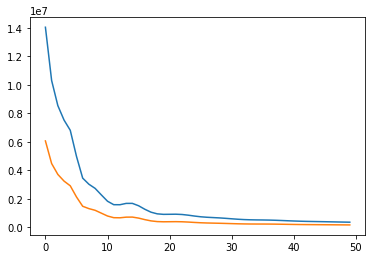

In [115]:
plt.plot(train_costs)
plt.plot(test_costs)
plt.show()

In [116]:
y_test_df = np.array(y_test_predicted)
y_test_index_df = np.array(y_test_index)
y_test_df
err = error_rate(y_test_df, y_test_index_df)
err

0.12936507936507938